In [4]:
import matplotlib.pyplot as plt
from IPython.display import HTML

import pandas as pd
import numpy as np
from pyrlap.hierarchicalrl.ham.hierarchicalqlearning import HierarchicalQLearner
from pyrlap.domains.taxicab.vis import animate_transitions
from pyrlap.hierarchicalrl.ham.domains.taxicab import simple_getput

np.random.seed(0)

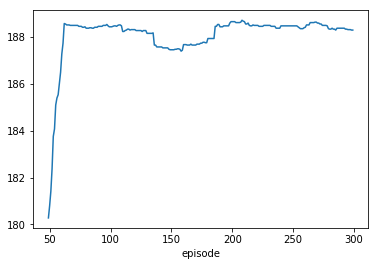

In [2]:
learner = HierarchicalQLearner(simple_getput,
                               learning_rate=.9,
                               discount_rate=.99,
                               initial_qvalue=0)
run_data = learner.train(episodes=300, max_choice_steps=100)
run_data = pd.DataFrame(run_data)
rolling = run_data.groupby('episode')['r'].sum().rolling(50)
rolling.mean().plot()

In [5]:
traj = learner.run()
ani = animate_transitions(learner.ham.mdp, traj, 
                          'simple_getput.mp4', 
                          move_interval=750)
plt.close()

In [7]:
HTML("""
<video width="500" height="500" controls>
  <source src="simple_getput.mp4" type="video/mp4">
</video>
""")